In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

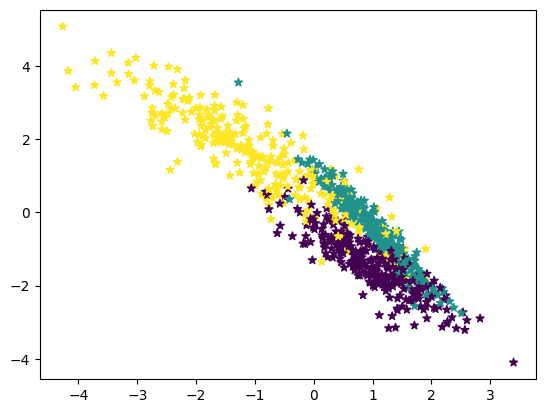

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [4]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


In [5]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


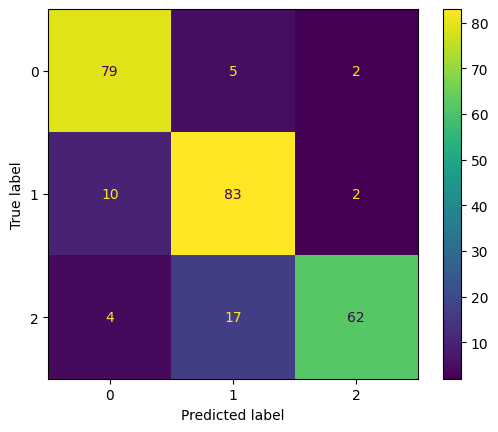

In [6]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [8]:
import pandas as pd


df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


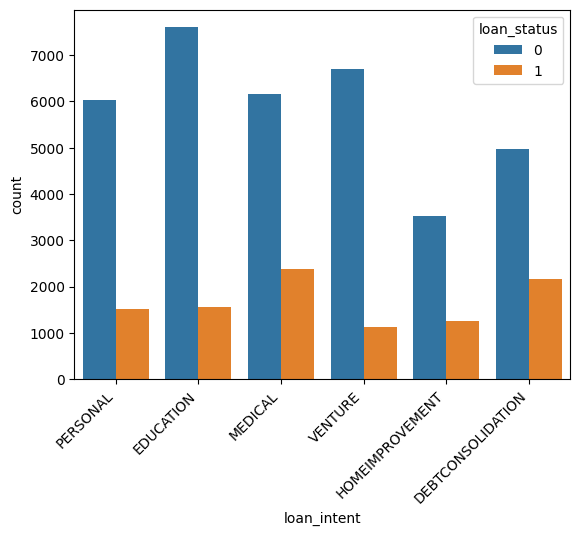

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='loan_intent', hue='loan_status')
plt.xticks(rotation=45, ha='right')
plt.show()


In [11]:
pre_df = pd.get_dummies(df,columns=['loan_intent'],drop_first=True)
pre_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,female,Master,71948.0,0,RENT,35000.0,16.02,0.49,3.0,561,No,1,False,False,False,True,False
1,21.0,female,High School,12282.0,0,OWN,1000.0,11.14,0.08,2.0,504,Yes,0,True,False,False,False,False
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,12.87,0.44,3.0,635,No,1,False,False,True,False,False
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,15.23,0.44,2.0,675,No,1,False,False,True,False,False
4,24.0,male,Master,66135.0,1,RENT,35000.0,14.27,0.53,4.0,586,No,1,False,False,True,False,False


In [13]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('loan_status', axis=1)
y = pre_df['loan_status']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [16]:
X_encoded = pd.get_dummies(pre_df.drop('loan_status', axis=1), drop_first=True)
y = pre_df['loan_status']


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.33, random_state=125
)


In [19]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [20]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8062626262626262
F1 Score: 0.8432083921625403


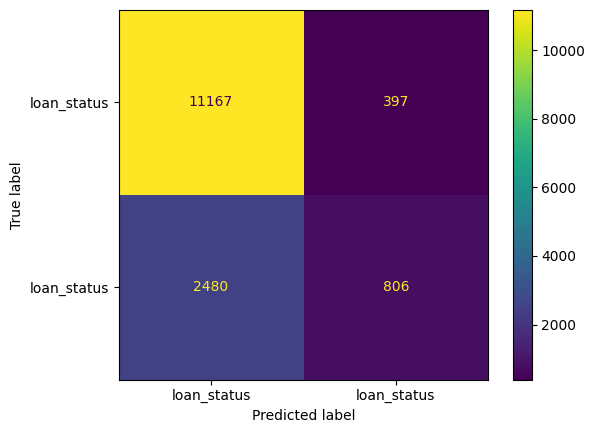

In [21]:
labels = ["loan_status", "loan_status"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();